In [1]:
import twint
import nest_asyncio
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.dates import MonthLocator

In [2]:
top5 = pd.read_csv("data\Top5VillagerTweetData.csv")
top5['date'] = pd.to_datetime(top5['date'])
top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7030 non-null   int64         
 1   Unnamed: 0.1    7030 non-null   int64         
 2   date            7030 non-null   datetime64[ns]
 3   tweet           7030 non-null   object        
 4   language        7030 non-null   object        
 5   hashtags        7030 non-null   object        
 6   likes_count     7030 non-null   int64         
 7   replies_count   7030 non-null   int64         
 8   retweets_count  7030 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 494.4+ KB


In [3]:
top5.head()

,Unnamed: 0,Unnamed: 0.1,date,tweet,language,hashtags,likes_count,replies_count,retweets_count
0,113,450,2021-04-09,˚୨୧⋆｡˚ —— I just had to get Judy back on juice...,en,"['acnh', 'どうぶつの森']",18,0,3
1,195,635,2021-04-09,Emotes of Animal Crossing's Judy for @erinbab3...,en,"['twitchemotes', 'emotes', 'twitchemoteartist'...",8,1,5
2,206,649,2021-04-09,SPOTTED amongst the flowers: Dom #AnimalCross...,en,"['animalcrossing', 'acnhdesign', 'どうぶつの森']",151,4,23
3,212,662,2021-04-09,Dom's new catchphrase #AnimalCrossing #ACNH #N...,en,"['animalcrossing', 'acnh', 'nintendoswitch']",33,2,2
4,224,683,2021-04-09,Two new mugs made today! Stitches and Dom! I'...,en,"['animalcrossingnewhorizons', 'animalcrossing'...",7,1,3


In [4]:
top5['date'] = pd.to_datetime(top5['date'])


In [11]:
raymond_sub = top5[(top5['tweet'].str.contains('Raymond')) & (top5['date'] > '2020-09-26') & (top5['date'] < '2020-10-07')]
raymond_group = raymond_sub.groupby('date')['tweet'].count().reset_index()

marshal_sub = top5[(top5['tweet'].str.contains('Marshal')) & (top5['date'] > '2020-09-24') & (top5['date'] < '2020-10-04')]
marshal_group = marshal_sub.groupby('date')['tweet'].count().reset_index()

sherb_sub = top5[(top5['tweet'].str.contains('Sherb')) & (top5['date'] > '2021-01-13') & (top5['date'] < '2021-01-26')]
sherb_group = sherb_sub.groupby('date')['tweet'].count().reset_index()

judy_sub = top5[(top5['tweet'].str.contains('Judy')) & (top5['date'] > '2021-03-04') & (top5['date'] < '2021-03-16')]
judy_group = judy_sub.groupby('date')['tweet'].count().reset_index()

Text(0, 0.5, 'Tweet Count')

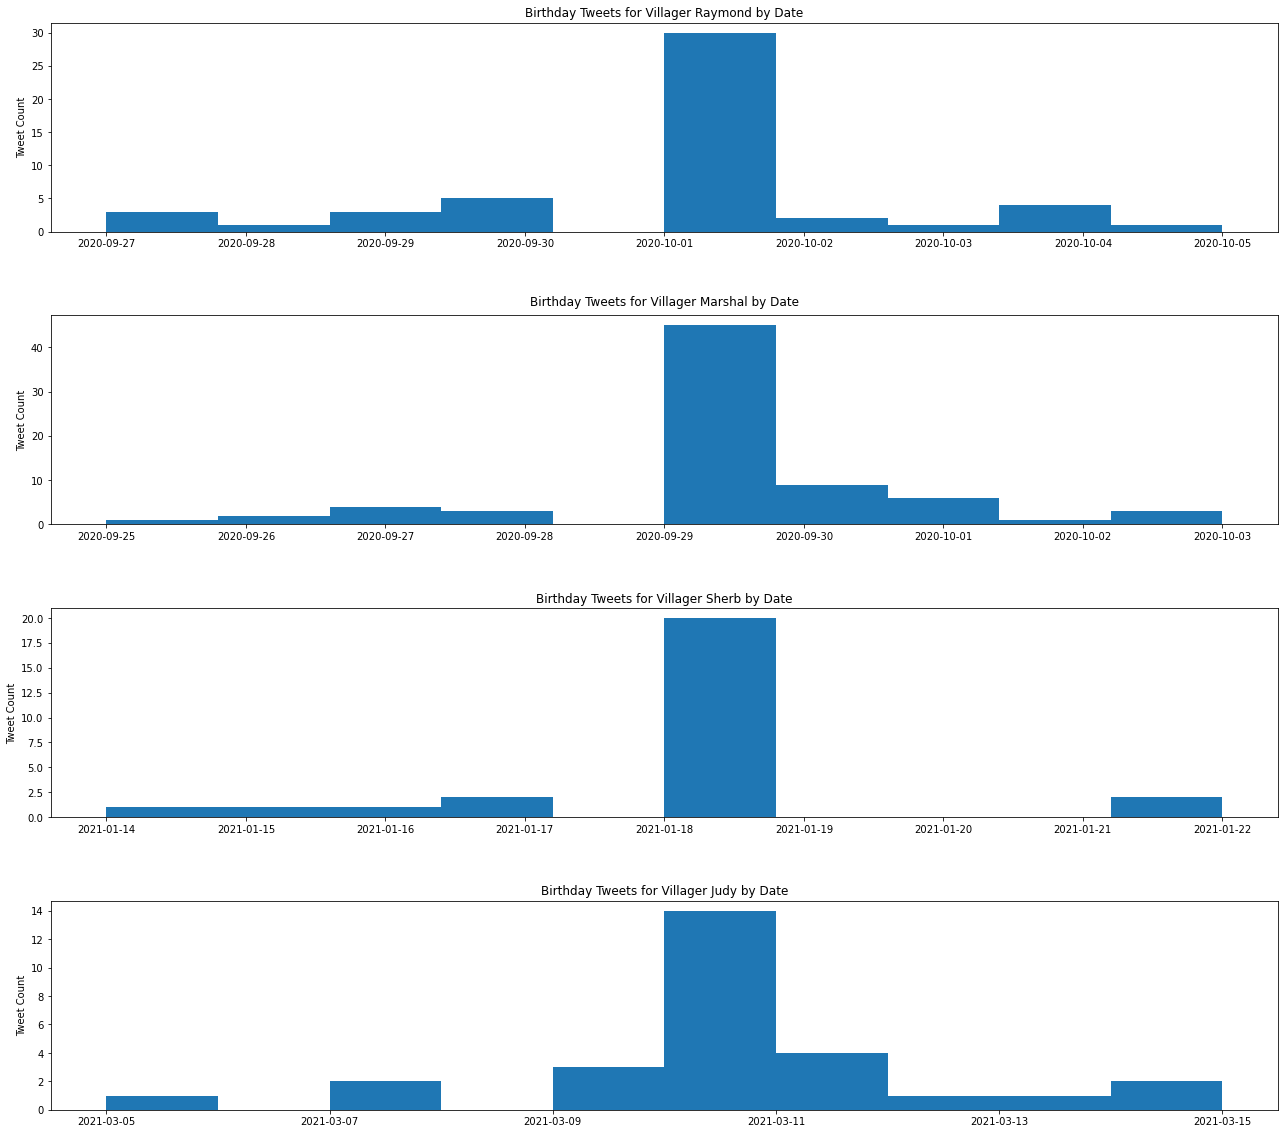

In [33]:
fig, ax = plt.subplots(4,1, figsize = (22, 20))
fig.subplots_adjust(hspace=.4)

ax[0].hist(raymond_sub['date'])
ax[0].set_title("Birthday Tweets for Villager Raymond by Date")
ax[0].set_ylabel('Tweet Count')

ax[1].hist(marshal_sub['date'])
ax[1].set_title("Birthday Tweets for Villager Marshal by Date", y=1.02)
ax[1].set_ylabel('Tweet Count')

ax[2].hist(sherb_sub['date'])
ax[2].set_title("Birthday Tweets for Villager Sherb by Date")
ax[2].set_ylabel('Tweet Count')

ax[3].hist(judy_sub['date'])
ax[3].set_title("Birthday Tweets for Villager Judy by Date")
ax[3].set_ylabel('Tweet Count')

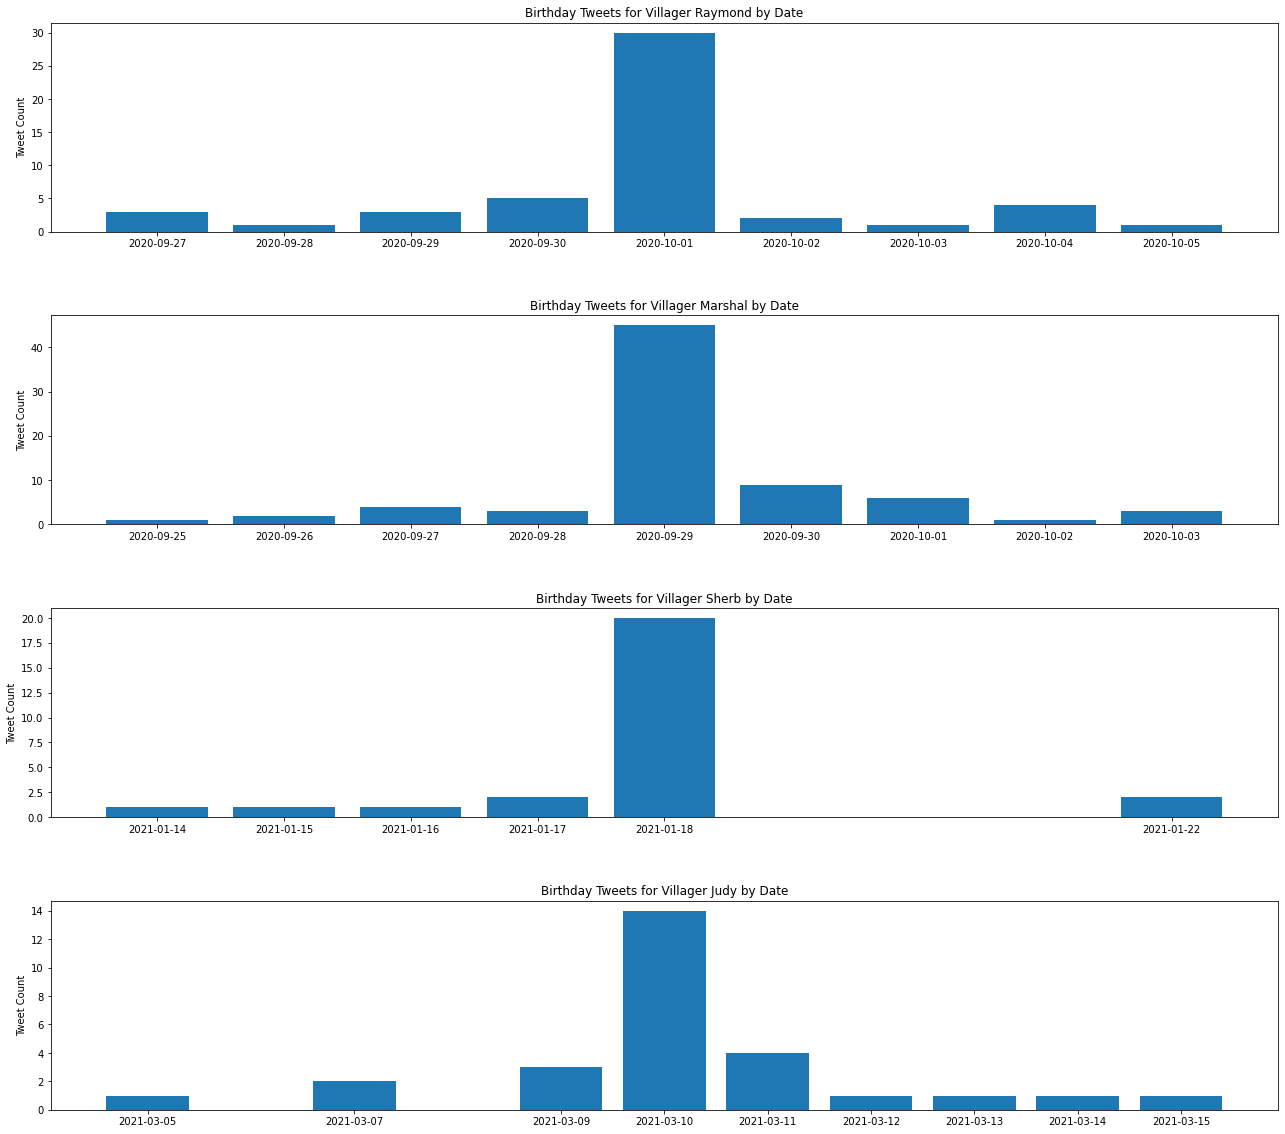

In [38]:
fig, ax = plt.subplots(4,1, figsize = (22, 20))
fig.subplots_adjust(hspace=.4)


ax[0].bar(raymond_group.date,raymond_group.tweet)
ax[0].set_xticks(raymond_group.date)
ax[0].set_title("Birthday Tweets for Villager Raymond by Date")
ax[0].set_ylabel('Tweet Count')


ax[1].bar(marshal_group.date,marshal_group.tweet)
ax[1].set_xticks(marshal_group.date)
ax[1].set_title("Birthday Tweets for Villager Marshal by Date")
ax[1].set_ylabel('Tweet Count')


ax[2].bar(sherb_group.date,sherb_group.tweet)
ax[2].set_xticks(sherb_group.date)
ax[2].set_title("Birthday Tweets for Villager Sherb by Date")
ax[2].set_ylabel('Tweet Count')


ax[3].bar(judy_group.date,judy_group.tweet)
ax[3].set_xticks(judy_group.date)
ax[3].set_title("Birthday Tweets for Villager Judy by Date")
ax[3].set_ylabel('Tweet Count')

ax = plt.gca()
plt.savefig('images\BirthdaySpikeforTop4Villagers.png', facecolor='w', edgecolor='w')